# Question 2 Milestone 2

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Training Data

In [58]:
df = pd.read_csv('../../games_data/feature_dataset_1_train.csv')
display(df.head(10))

,Distance,Angle,Goal,Empty Net
0,55.9,10.3,0,0
1,38.4,38.7,0,0
2,53.2,28.0,0,0
3,11.7,70.0,0,0
4,10.0,0.0,0,0
5,12.8,51.3,0,0
6,26.2,72.3,0,0
7,8.2,76.0,0,0
8,11.4,37.9,0,0
9,40.3,7.1,0,0


## Histogramme du nombre de tirs (buts et non-buts séparés), regroupées par distance

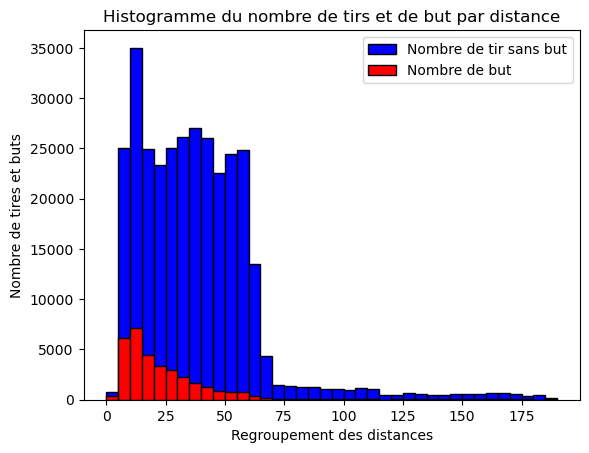

In [59]:
goal = df[df["Goal"] == 1]["Distance"]
no_goal = df[df["Goal"] == 0]["Distance"]
bin_size = 5


bin = range(0, int(df["Distance"].max()) + bin_size, bin_size)

plt.figure()
plt.hist(no_goal, bin, color="blue", label="Nombre de tir sans but", edgecolor='black')
plt.hist(goal, bin, color="red", label="Nombre de but", edgecolor='black')

plt.title("Histogramme du nombre de tirs et de but par distance")
plt.xlabel("Regroupement des distances")
plt.ylabel("Nombre de tires et buts")
plt.legend()
plt.show()




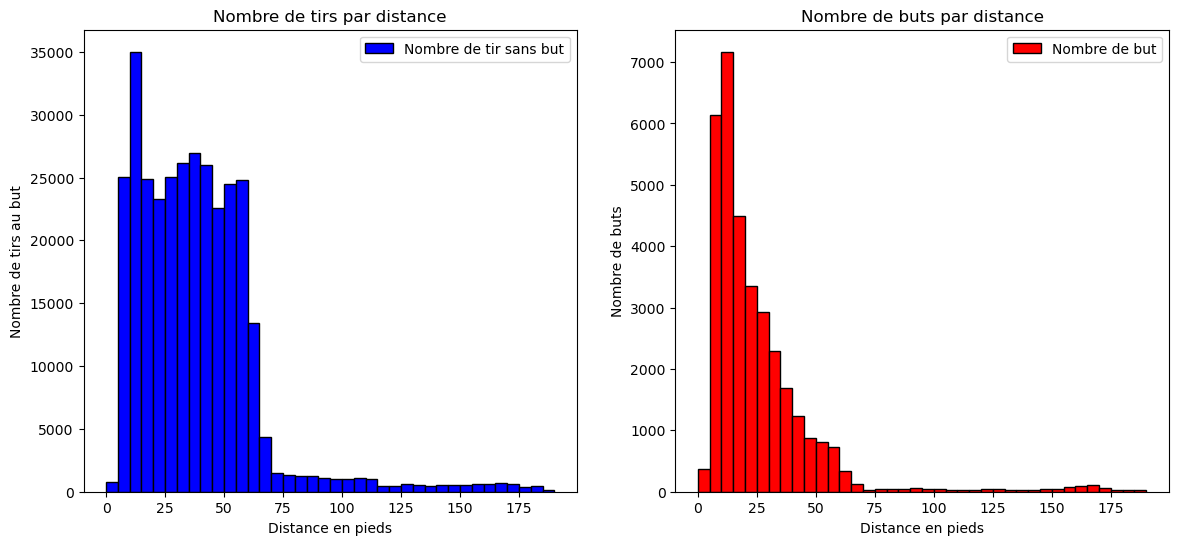

In [60]:
goal = df[df["Goal"] == 1]["Distance"]
no_goal = df[df["Goal"] == 0]["Distance"]
bin_size = 5


bin_goal = range(0, int(goal.max()) + bin_size, bin_size)
bin_no_goal = range(0, int(no_goal.max()) + bin_size, bin_size)

fig, axes = plt.subplots(1, 2, figsize=(14,6))

axes[0].hist(no_goal, bin_goal, color="blue", label="Nombre de tir sans but", edgecolor='black')
axes[1].hist(goal, bin_no_goal, color="red", label="Nombre de but", edgecolor='black')

axes[0].set_title("Nombre de tirs par distance")
axes[0].set_ylabel("Nombre de tirs au but")
axes[0].set_xlabel("Distance en pieds")
axes[0].legend()

axes[1].set_title("Nombre de buts par distance")
axes[1].set_ylabel("Nombre de buts")
axes[1].set_xlabel("Distance en pieds")
axes[1].legend()

plt.show()




## Histogramme du nombre de tirs (buts et non-buts séparés), regroupées par angle

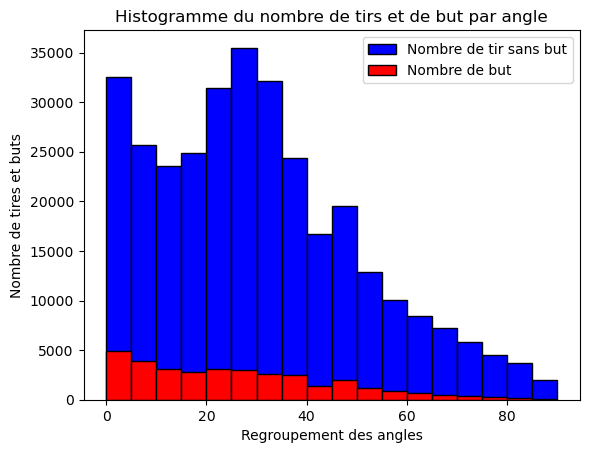

In [61]:
goal = df[df["Goal"] == 1]["Angle"]
no_goal = df[df["Goal"] == 0]["Angle"]
bin_size = 5


bin = range(0, int(df["Angle"].max()) + bin_size, bin_size)

plt.figure()
plt.hist(no_goal, bin, color="blue", label="Nombre de tir sans but", edgecolor='black')
plt.hist(goal, bin, color="red", label="Nombre de but", edgecolor='black')

plt.title("Histogramme du nombre de tirs et de but par angle")
plt.xlabel("Regroupement des angles")
plt.ylabel("Nombre de tires et buts")
plt.legend()
plt.show()




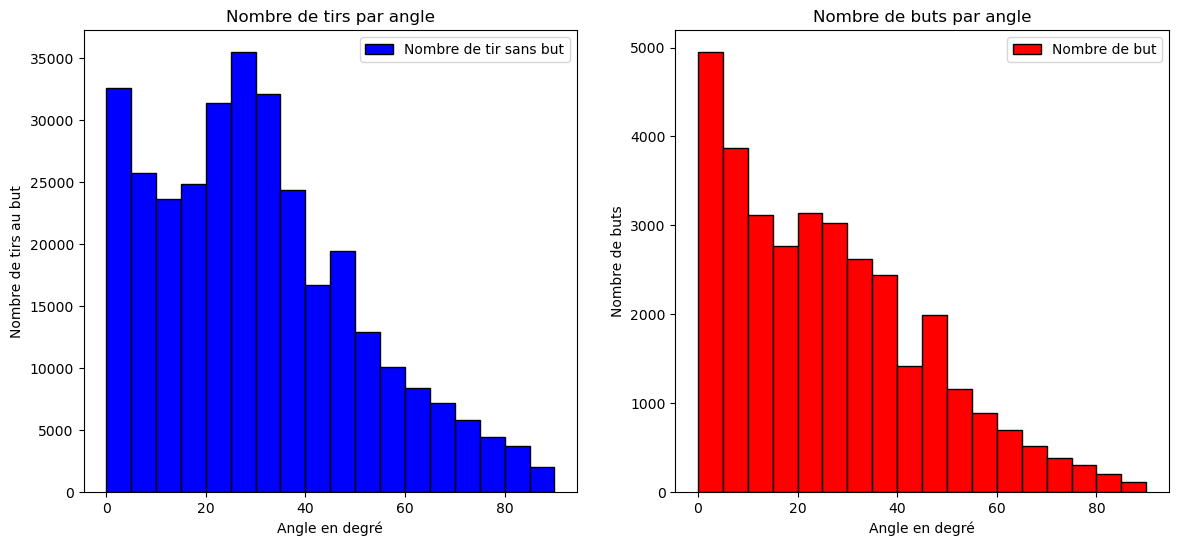

In [62]:
goal = df[df["Goal"] == 1]["Angle"]
no_goal = df[df["Goal"] == 0]["Angle"]
bin_size = 5


bin_goal = range(0, int(goal.max()) + bin_size, bin_size)
bin_no_goal = range(0, int(no_goal.max()) + bin_size, bin_size)

fig, axes = plt.subplots(1, 2, figsize=(14,6))

axes[0].hist(no_goal, bin_goal, color="blue", label="Nombre de tir sans but", edgecolor='black')
axes[1].hist(goal, bin_no_goal, color="red", label="Nombre de but", edgecolor='black')

axes[0].set_title("Nombre de tirs par angle")
axes[0].set_ylabel("Nombre de tirs au but")
axes[0].set_xlabel("Angle en degré")
axes[0].legend()

axes[1].set_title("Nombre de buts par angle")
axes[1].set_ylabel("Nombre de buts")
axes[1].set_xlabel("Angle en degré")
axes[1].legend()

plt.show()




## Histogramme de la relation entre distance et angle

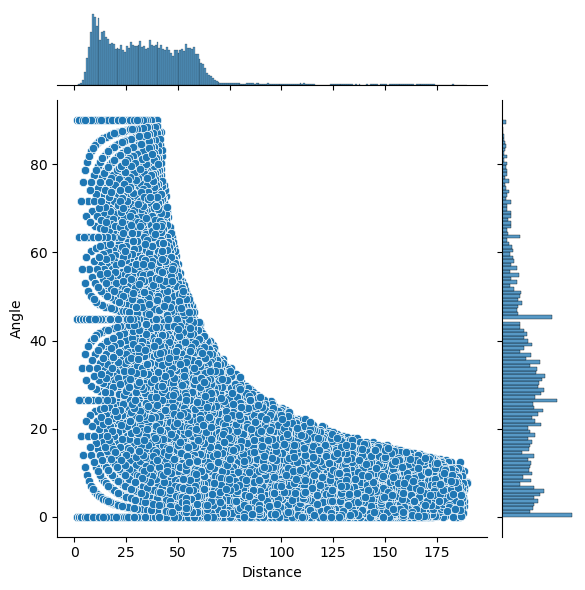

In [69]:

sns.jointplot(data=df, x="Distance", y="Angle")




## Taux de but par rapport à la distance

In [ ]:
df_taux = df.copy()

bin_distance = range(0, int(df_taux["Distance"].max()) + bin_size, bin_size)


label = [f'{bin_distance[i]}-{bin_distance[i+1]}' for i in range(len(bin_distance)-1)]
df_taux['Distance bin'] = pd.cut(df_taux["Distance"], bins=bin_distance, labels=label)
df_group = df_taux.groupby('Distance bin')
nbr_but = df_group["Goal"].sum()
nbr_tir_totaux = df_group["Goal"].count()

print(nbr_tir_totaux)


Distance bin
0-5         556
5-10       6637
10-15      6757
15-20      4434
20-25      3293
25-30      2878
30-35      2256
35-40      1675
40-45      1205
45-50       878
50-55       817
55-60       712
60-65       323
65-70       122
70-75        34
75-80        50
80-85        40
85-90        43
90-95        57
95-100       52
100-105      38
105-110      34
110-115      36
115-120      17
120-125      42
125-130      36
130-135      35
135-140      31
140-145      36
145-150      46
150-155      55
155-160      71
160-165     102
165-170      92
170-175      55
175-180      29
180-185      24
185-190      22
Name: Goal, dtype: int64


C:\Users\alnn\AppData\Local\Temp\ipykernel_8700\333529935.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_group = df_taux.groupby('Distance bin')


## Taux de but par rapport à l'angle